# Understanding sklearn.make_classification()

This notebook provides a detailed exploration of the `make_classification()` function from scikit-learn, which is used to generate synthetic datasets for classification problems.

## Parameters Overview
- `n_samples`: The number of samples
- `n_features`: The total number of features
- `n_informative`: The number of informative features
- `n_redundant`: The number of redundant features
- `n_repeated`: The number of duplicated features
- `n_classes`: The number of classes
- `n_clusters_per_class`: The number of clusters per class
- `weights`: The proportions of samples assigned to each class
- `flip_y`: The fraction of samples whose class is randomly flipped
- `class_sep`: The factor multiplying the hypercube size

In [2]:
!pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
# import seaborn

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
# plt.style.use('seaborn')
sns.set_palette('husl')

## 1. Basic Example: Binary Classification

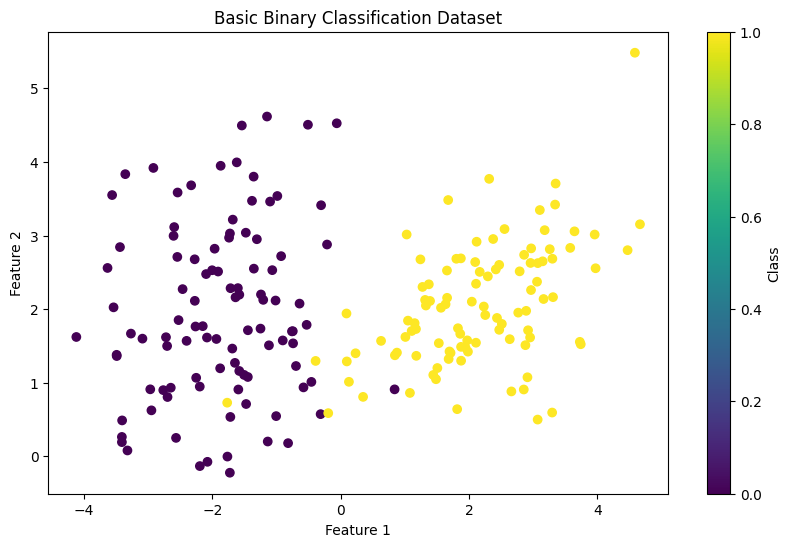

In [13]:
# Generate a simple binary classification dataset
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=42,
    class_sep = 2,
    n_clusters_per_class = 1
    
)

# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Basic Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()

In [14]:
X

array([[ 1.27071018e-01,  1.01304200e+00],
       [ 2.31293463e+00,  3.77053357e+00],
       [ 3.34042818e+00,  3.42099601e+00],
       [ 3.29454774e+00,  5.95619812e-01],
       [ 1.94410516e+00,  1.47724090e+00],
       [-1.11959689e+00,  1.50891314e+00],
       [ 1.15108470e+00,  1.81007677e+00],
       [-1.00745441e+00,  5.47157435e-01],
       [-2.25396925e+00,  1.06769236e+00],
       [-1.24392415e+00,  2.19979806e+00],
       [-2.92089280e+00,  3.91894990e+00],
       [-5.11937308e-01,  4.50578584e+00],
       [ 3.25751204e+00,  2.81515089e+00],
       [-4.12190908e+00,  1.62220145e+00],
       [ 2.87768113e+00,  1.51095984e+00],
       [-5.32144582e-01,  1.78719280e+00],
       [ 1.48404809e+00,  1.04843842e+00],
       [-1.54235518e+00,  4.49536942e+00],
       [ 2.04235818e+00,  2.10204918e+00],
       [ 2.63367133e+00,  1.59219328e+00],
       [ 2.85756778e+00,  2.73826470e+00],
       [-3.41167954e+00,  1.93790864e-01],
       [ 1.87481918e+00,  1.48815664e+00],
       [-9.

## 2. Exploring n_informative and n_redundant

In [ ]:
def plot_feature_importance(X, y, title):
    # Calculate correlation with target
    correlations = [abs(np.corrcoef(X[:, i], y)[0, 1]) for i in range(X.shape[1])]
    
    # Plot feature correlations
    plt.figure(figsize=(12, 4))
    plt.bar(range(len(correlations)), correlations)
    plt.title(f'Feature Correlations with Target - {title}')
    plt.xlabel('Feature Index')
    plt.ylabel('Absolute Correlation')
    plt.show()

# Generate dataset with informative and redundant features
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=3,
    n_redundant=4,
    n_repeated=0,
    random_state=42
)

plot_feature_importance(X, y, 'With Redundant Features')

## 3. Multi-class Classification

In [ ]:
# Generate multi-class dataset
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=4,
    n_clusters_per_class=1,
    random_state=42
)

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Multi-class Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter, label='Class')
plt.show()

## 4. Class Separation (class_sep parameter)

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
separations = [0.5, 2.0, 4.0]

for i, sep in enumerate(separations):
    X, y = make_classification(
        n_samples=1000,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_classes=2,
        class_sep=sep,
        random_state=42
    )
    
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    axes[i].set_title(f'Class Separation = {sep}')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

## 5. Clusters per Class

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
clusters = [1, 2, 3]

for i, n_clusters in enumerate(clusters):
    X, y = make_classification(
        n_samples=1000,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_classes=2,
        n_clusters_per_class=n_clusters,
        random_state=42
    )
    
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    axes[i].set_title(f'{n_clusters} Cluster(s) per Class')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

## 6. Class Weights and Imbalanced Data

In [ ]:
# Generate imbalanced dataset
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    weights=[0.9, 0.1],  # 90% class 0, 10% class 1
    random_state=42
)

# Plot dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Imbalanced Dataset (90-10 split)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Add class distribution information
class_counts = np.bincount(y)
plt.text(0.02, 0.98, f'Class 0: {class_counts[0]} samples\nClass 1: {class_counts[1]} samples',
         transform=plt.gca().transAxes, verticalalignment='top')

plt.colorbar(label='Class')
plt.show()

## 7. Noisy Labels (flip_y parameter)

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
flip_ratios = [0.0, 0.1, 0.3]

for i, flip in enumerate(flip_ratios):
    X, y = make_classification(
        n_samples=1000,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_classes=2,
        flip_y=flip,
        random_state=42
    )
    
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    axes[i].set_title(f'Label Noise = {flip*100}%')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

## 8. High-dimensional Data Visualization

In [ ]:
# Generate high-dimensional dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=5,
    n_redundant=10,
    n_repeated=5,
    n_classes=3,
    random_state=42
)

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA Visualization of High-dimensional Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Plot explained variance ratio
plt.subplot(1, 2, 2)
explained_var = pca.explained_variance_ratio_
plt.bar(range(len(explained_var)), explained_var[:10])
plt.title('Explained Variance Ratio (First 10 Components)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

plt.tight_layout()
plt.show()

## Summary of Key Parameters

1. **Basic Parameters**:
   - `n_samples`: Controls dataset size
   - `n_features`: Total number of features
   - `n_classes`: Number of classes

2. **Feature Control**:
   - `n_informative`: Features that are actually useful
   - `n_redundant`: Features that are linear combinations of informative features
   - `n_repeated`: Duplicated features

3. **Class Control**:
   - `n_clusters_per_class`: Complexity of class distributions
   - `class_sep`: Separation between classes
   - `weights`: Class balance control

4. **Noise Control**:
   - `flip_y`: Label noise
   - `random_state`: Reproducibility control